In [0]:
import pandas as pd
from google.colab import files

In [0]:
uploaded = files.upload()

Saving dataset_TSMC2014_NYC.csv to dataset_TSMC2014_NYC (3).csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "dataset_TSMC2014_NYC.csv" with length 29253118 bytes


In [0]:
import io
ny_data=pd.read_csv(io.BytesIO(uploaded['dataset_TSMC2014_NYC.csv']))
ny_data.head()                                                                            



,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [0]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
ny_data.describe()

,userId,latitude,longitude,timezoneOffset
count,227428.000000,227428.000000,227428.000000,227428.000000
mean,535.304817,40.754045,-73.974556,-253.392019
std,305.398774,0.072458,0.086209,43.234750
min,1.000000,40.550852,-74.274766,-420.000000
25%,287.000000,40.718330,-74.000633,-240.000000
50%,523.000000,40.747745,-73.983479,-240.000000
75%,793.000000,40.778374,-73.945709,-240.000000
max,1083.000000,40.988332,-73.683825,660.000000


In [0]:
import datetime
data = []
for utcoffset_index, utcoffset in enumerate(ny_data['utcTimestamp']):    
    year = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%Y')
    month = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%m')
    day = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%d')
    weekday = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%a')
    time = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%H')
    data.append([year, month, day, weekday, time])
ny_data_fe = pd.DataFrame(data, columns = ['year', 'month', 'day', 'weekday', 'time'])

for col in ny_data_fe.columns:
    if col not in ['weekday', 'time']:
        ny_data[col] = pd.to_numeric(ny_data_fe[col])
    else:
        ny_data[col] = ny_data_fe[col]

ny_data.describe()

,userId,latitude,longitude,timezoneOffset,year,month,day
count,227428.000000,227428.000000,227428.000000,227428.000000,227428.000000,227428.000000,227428.000000
mean,535.304817,40.754045,-73.974556,-253.392019,2012.101034,6.249512,14.683794
std,305.398774,0.072458,0.086209,43.234750,0.301375,3.023309,8.151403
min,1.000000,40.550852,-74.274766,-420.000000,2012.000000,1.000000,1.000000
25%,287.000000,40.718330,-74.000633,-240.000000,2012.000000,4.000000,8.000000
50%,523.000000,40.747745,-73.983479,-240.000000,2012.000000,5.000000,14.000000
75%,793.000000,40.778374,-73.945709,-240.000000,2012.000000,8.000000,21.000000
max,1083.000000,40.988332,-73.683825,660.000000,2013.000000,12.000000,31.000000


In [0]:
ny_data['year'] = np.where(ny_data['year'] == 2012, 1, 0)
ny_data.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,year,month,day,weekday,time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,1,4,3,Tue,18
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,1,4,3,Tue,18
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,1,4,3,Tue,18
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,1,4,3,Tue,18
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,1,4,3,Tue,18


In [0]:
ny_data1=pd.get_dummies(ny_data.weekday)
ny_data2=pd.get_dummies(ny_data.time)


In [0]:
merged=pd.concat([ny_data,ny_data1,ny_data2],axis='columns')
merged

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,year,month,day,weekday,time,Fri,Mon,Sat,Sun,Thu,Tue,Wed,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,1,4,3,Tue,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,1,4,3,Tue,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,1,4,3,Tue,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,1,4,3,Tue,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,1,4,3,Tue,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012,1,4,3,Tue,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,642,4ab966c3f964a5203c7f20e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.751591,-73.974121,-240,Tue Apr 03 18:04:38 +0000 2012,1,4,3,Tue,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,292,4d0cc47f903d37041864bf55,4bf58dd8d48988d12b951735,Bus Station,40.779422,-73.955341,-240,Tue Apr 03 18:04:42 +0000 2012,1,4,3,Tue,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,428,4ce1863bc4f6a35d8bd2db6c,4bf58dd8d48988d103941735,Home (private),40.619151,-74.035888,-240,Tue Apr 03 18:06:18 +0000 2012,1,4,3,Tue,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,877,4be319b321d5a59352311811,4bf58dd8d48988d10a951735,Bank,40.619006,-73.990375,-240,Tue Apr 03 18:06:19 +0000 2012,1,4,3,Tue,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
ny_data=merged

In [0]:
grouped = ny_data.groupby(by='venueCategoryId')
for _, group in grouped:
    print(group.head())

      userId                   venueId           venueCategoryId  ... 21  22  23
323       47  4a914773f964a520dd1920e3  4bf58dd8d48988d100941735  ...  1   0   0
377      381  4e405e39483b04e17abb677f  4bf58dd8d48988d100941735  ...  1   0   0
403      637  4a914773f964a520dd1920e3  4bf58dd8d48988d100941735  ...  1   0   0
1250      84  4ee73945e30005f8ba684170  4bf58dd8d48988d100941735  ...  0   0   0
2046     381  4e405e39483b04e17abb677f  4bf58dd8d48988d100941735  ...  0   0   0

[5 rows x 44 columns]
      userId                   venueId           venueCategoryId  ... 21  22  23
713      824  4e2d913514955dbf7aefc95a  4bf58dd8d48988d100951735  ...  0   0   0
1954     389  4a902d50f964a5205c1620e3  4bf58dd8d48988d100951735  ...  0   0   0
2128    1027  4b4bc857f964a52085a726e3  4bf58dd8d48988d100951735  ...  0   0   0
2301     374  4d98ca65b188721ea17d3037  4bf58dd8d48988d100951735  ...  1   0   0
2365     328  4afb40d6f964a520661c22e3  4bf58dd8d48988d100951735  ...  0   1   0

[5 r

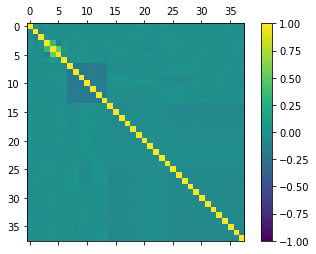

In [0]:
correlations = ny_data.corr()
fig = plt.figure()
ax= fig.add_subplot(111)
cax= ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)

plt.show()

In [0]:
ny_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227428 entries, 0 to 227427
Data columns (total 44 columns):
userId             227428 non-null int64
venueId            227428 non-null object
venueCategoryId    227428 non-null object
venueCategory      227428 non-null object
latitude           227428 non-null float64
longitude          227428 non-null float64
timezoneOffset     227428 non-null int64
utcTimestamp       227428 non-null object
year               227428 non-null int64
month              227428 non-null int64
day                227428 non-null int64
weekday            227428 non-null object
time               227428 non-null object
Fri                227428 non-null uint8
Mon                227428 non-null uint8
Sat                227428 non-null uint8
Sun                227428 non-null uint8
Thu                227428 non-null uint8
Tue                227428 non-null uint8
Wed                227428 non-null uint8
00                 227428 non-null uint8
01                

In [0]:
print(ny_data.isnull().sum())

userId             0
venueId            0
venueCategoryId    0
venueCategory      0
latitude           0
longitude          0
timezoneOffset     0
utcTimestamp       0
year               0
month              0
day                0
weekday            0
time               0
Fri                0
Mon                0
Sat                0
Sun                0
Thu                0
Tue                0
Wed                0
00                 0
01                 0
02                 0
03                 0
04                 0
05                 0
06                 0
07                 0
08                 0
09                 0
10                 0
11                 0
12                 0
13                 0
14                 0
15                 0
16                 0
17                 0
18                 0
19                 0
20                 0
21                 0
22                 0
23                 0
dtype: int64


In [0]:
print(ny_data['venueCategory'].value_counts())

Bar                                         15978
Home (private)                              15382
Office                                      12740
Subway                                       9348
Gym / Fitness Center                         9171
Coffee Shop                                  7510
Food & Drink Shop                            6596
Train Station                                6408
Park                                         4804
Neighborhood                                 4604
Bus Station                                  4474
Deli / Bodega                                4214
Residential Building (Apartment / Condo)     4185
Other Great Outdoors                         4134
American Restaurant                          3701
College Academic Building                    3479
Building                                     3474
Medical Center                               3366
Road                                         3207
Clothing Store                               2976


In [81]:
no_of_checkins=ny_data['venueCategory'].value_counts().head(8)
no_of_checkins

Bar                     15978
Home (private)          15382
Office                  12740
Subway                   9348
Gym / Fitness Center     9171
Coffee Shop              7510
Food & Drink Shop        6596
Train Station            6408
Name: venueCategory, dtype: int64

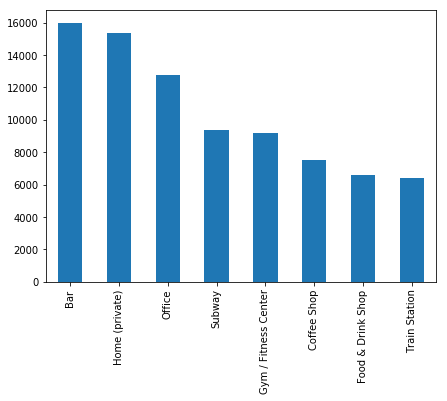

In [83]:
ax=no_of_checkins.plot(kind='bar',figsize=[7,5],width=0.5)

In [0]:
checkins_per_category1=ny_data.groupby('weekday').utcTimestamp.nunique()
print(checkins_per_category1)

weekday
Fri    33395
Mon    32086
Sat    34008
Sun    32286
Thu    30172
Tue    31699
Wed    31007
Name: utcTimestamp, dtype: int64


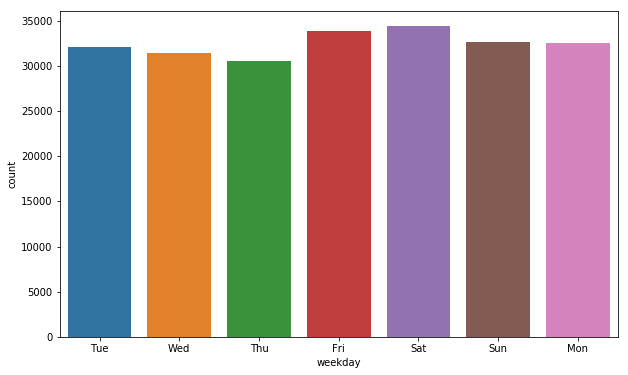

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(x='weekday',data=ny_data);

In [90]:
dist_of_time=ny_data.groupby('time').weekday.count()
dist_of_time

time
00    13874
01    10650
02     8631
03     7359
04     6052
05     4533
06     3240
07     2397
08     2146
09     2730
10     4755
11     8786
12    13492
13    14209
14    11267
15     9430
16    11470
17    13739
18    13202
19    11685
20    11044
21    12482
22    14915
23    15340
Name: weekday, dtype: int64

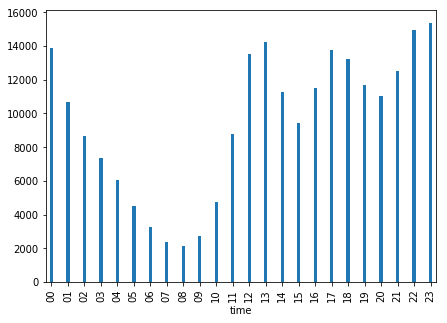

In [92]:
dist_of_time.plot(kind='bar',figsize=[7,5],width=0.2)

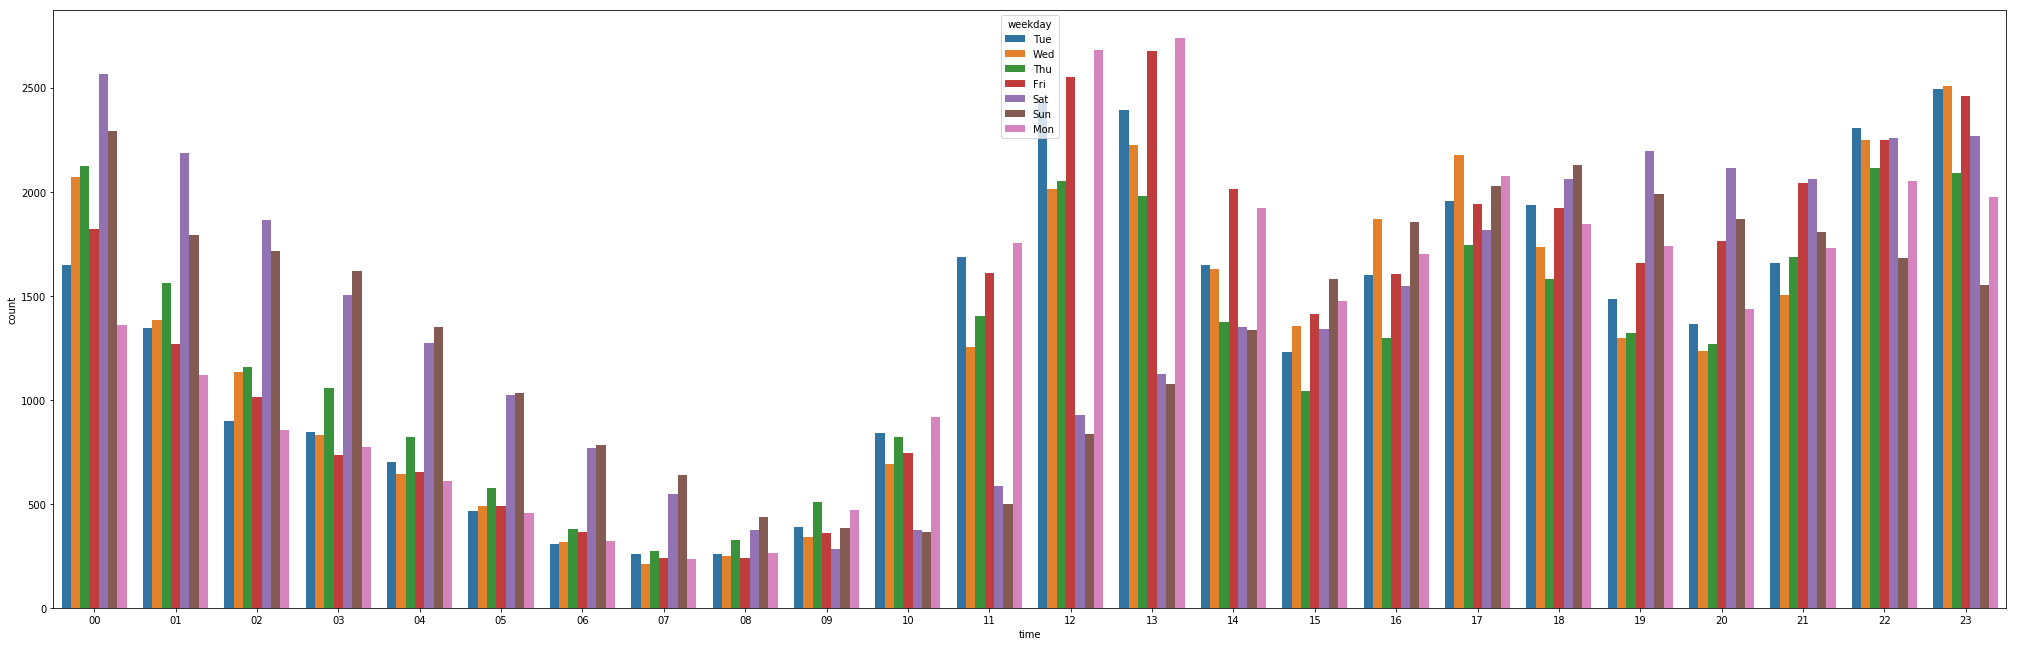

In [93]:
plt.figure(figsize=(35,11))
sns.countplot('time',data=ny_data,hue='weekday');

In [0]:
datasample=ny_data.sample(10)

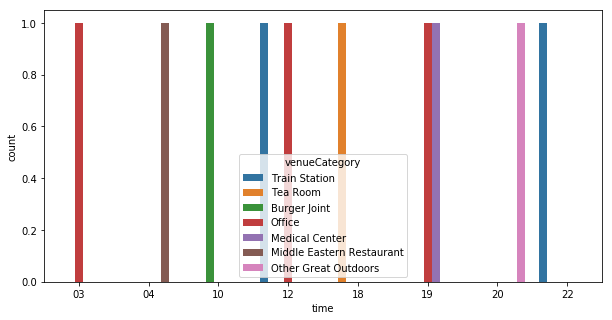

In [101]:
plt.figure(figsize=(10,5))
sns.countplot('time',data=datasample,hue='venueCategory');

<BarContainer object of 10 artists>

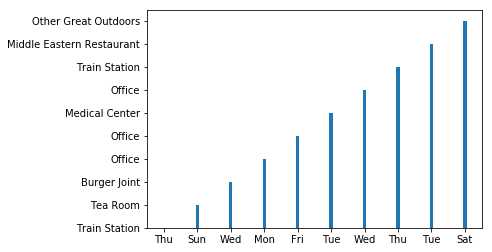

In [103]:
venuecategory=datasample.venueCategory
weekdays=datasample.weekday
y=np.arange(len(venuecategory))
x=np.arange(len(weekdays))
x
plt.xticks(x,weekdays)
plt.yticks(y,venuecategory)
plt.bar(x,y,width=0.1)

In [105]:
selected_features = ['latitude','longitude','Mon','Tue','Wed','00','18','timezoneOffset','day','userId','23','22','01']

data, labels = ny_data[selected_features], ny_data['venueCategory']
data.shape

(227428, 13)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20,random_state=42)

X_train.shape, X_test.shape, y_test.shape, y_train.shape

((181942, 13), (45486, 13), (45486,), (181942,))

In [107]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9915467566587154

In [108]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                          precision    recall  f1-score   support

                       Afghan Restaurant       0.00      0.00      0.00         1
                      African Restaurant       0.00      0.00      0.00         6
                                 Airport       0.79      0.95      0.86       588
                     American Restaurant       0.21      0.25      0.23       777
                          Animal Shelter       0.23      0.38      0.29         8
                            Antique Shop       0.00      0.00      0.00         4
                                Aquarium       0.00      0.00      0.00         1
                                  Arcade       0.72      0.74      0.73        72
                        Arepa Restaurant       0.00      0.00      0.00         5
                  Argentinian Restaurant       0.00      0.00      0.00         2
                             Art Gallery       0.38      0.42      0.40       104
               

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [109]:
clf.score(X_test,y_test)

0.4985270193026426